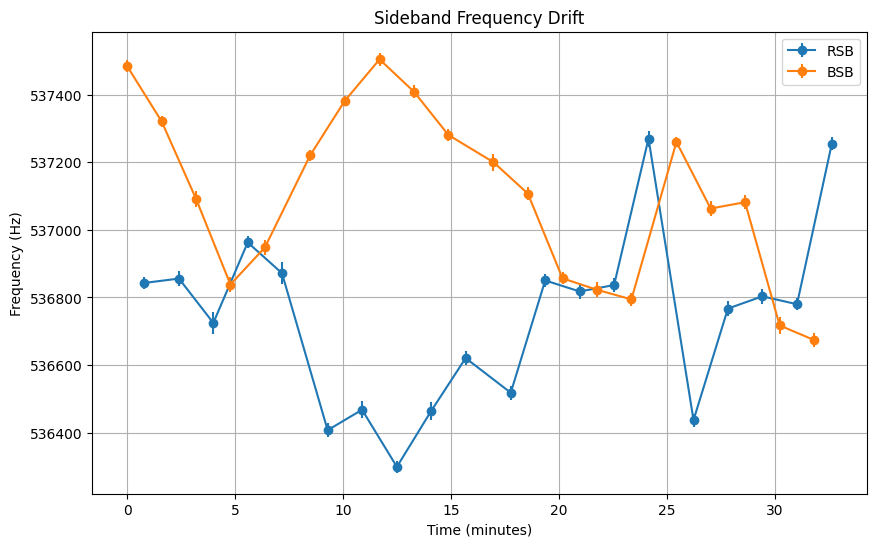

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from files
rsb_data = np.loadtxt('RSB.txt', skiprows=1)
bsb_data = np.loadtxt('BSB.txt', skiprows=1)

# Split into frequencies and timestamps
rsb_freqs = rsb_data[:,0]  
rsb_times = rsb_data[:,1]
bsb_freqs = bsb_data[:,0]
bsb_times = bsb_data[:,1]

rsb_var=rsb_data[:,2]
bsb_var=bsb_data[:,2]

# Convert timestamps to minutes from start
t0 = min(rsb_times[0], bsb_times[0])
rsb_times = (rsb_times - t0)/60
bsb_times = (bsb_times - t0)/60

# Plot
plt.figure(figsize=(10,6))
plt.errorbar(rsb_times, rsb_freqs, yerr=np.sqrt(np.abs(rsb_var)), fmt='o-', label='RSB')
plt.errorbar(bsb_times, bsb_freqs, yerr=np.sqrt(np.abs(bsb_var)), fmt='o-', label='BSB')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency (Hz)')
plt.title('Sideband Frequency Drift')
plt.legend()
plt.grid(True)
plt.show()


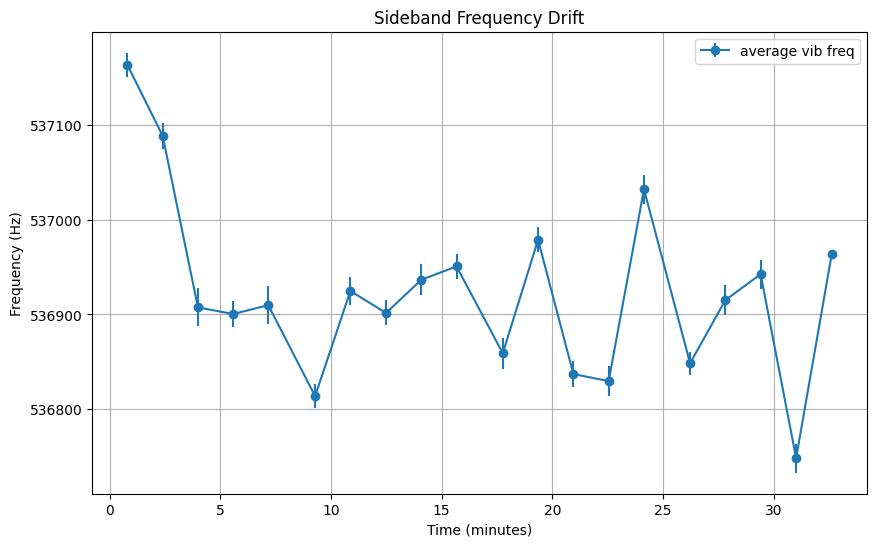

In [28]:
import numpy as np
import matplotlib.pyplot as plt



# Split into frequencies and timestamps
rsb_freqs = rsb_data[:,0]  
rsb_times = rsb_data[:,1]
bsb_freqs = bsb_data[:,0]
bsb_times = bsb_data[:,1]
rsb_var=rsb_data[:,2]
bsb_var=bsb_data[:,2]

# Convert timestamps to minutes from start
t0 = min(rsb_times[0], bsb_times[0])
rsb_times = (rsb_times - t0)/60
bsb_times = (bsb_times - t0)/60

# Plot
plt.figure(figsize=(10,6))
plt.errorbar(rsb_times, rsb_freqs/2+bsb_freqs/2, yerr=np.sqrt(np.abs(rsb_var/4+bsb_var/4)), fmt='o-', label='average vib freq')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency (Hz)')
plt.title('Sideband Frequency Drift')
plt.legend()
plt.grid(True)
#plt.ylim(537200, 537800)
plt.show()


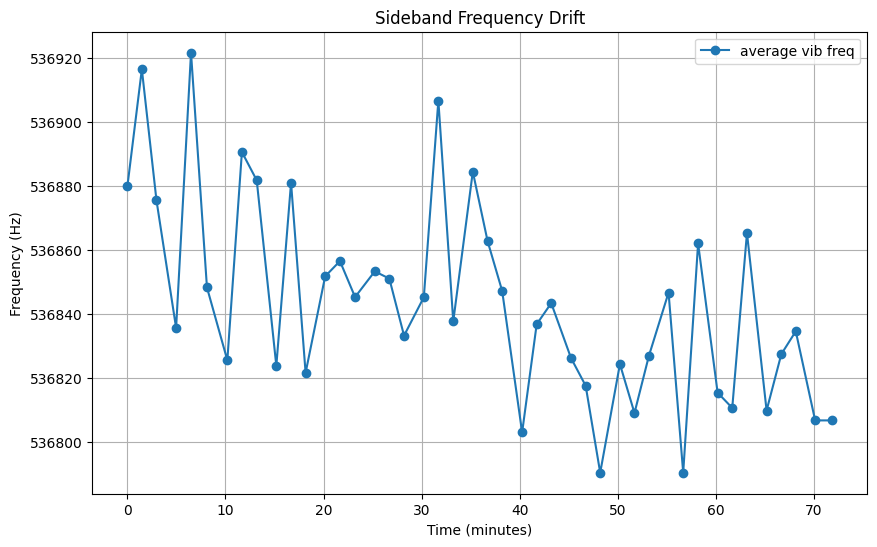

In [42]:
import numpy as np
import matplotlib.pyplot as plt

vib_data = np.loadtxt('vib_freq.txt', skiprows=1)


# Split into frequencies and timestamps
vib_freqs = vib_data[:,0]  
vib_times = vib_data[:,1]



# Convert timestamps to minutes from start
t0 = min(vib_times)
vib_times = (vib_times - t0)/60

vib_times=vib_times[0:44]
vib_freqs=vib_freqs[0:44]

# Plot
plt.figure(figsize=(10,6))
plt.errorbar(vib_times, vib_freqs, fmt='o-', label='average vib freq')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency (Hz)')
plt.title('Sideband Frequency Drift')
plt.legend()
plt.grid(True)



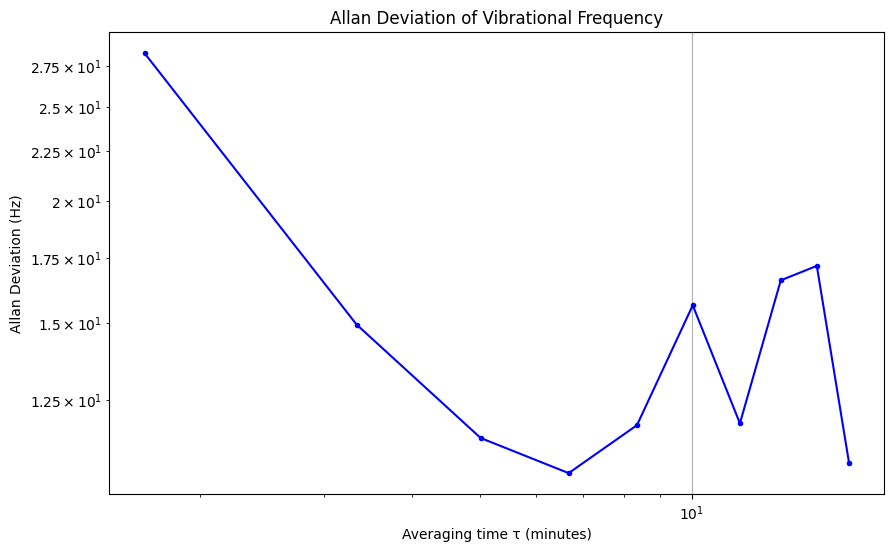

In [43]:
# Calculate Allan deviation
def allan_deviation(data, tau):
    n = len(data)
    m = int(n/tau)  # Number of groups
    
    # Split data into groups of size tau
    groups = np.array_split(data[:m*tau], m)
    
    # Calculate means of each group
    means = np.array([np.mean(group) for group in groups])
    
    # Calculate Allan variance
    diff_squared = np.sum(np.diff(means)**2)
    allan_var = diff_squared/(2*(m-1))
    
    return np.sqrt(allan_var)

'''

'''

# Calculate Allan deviation for different tau values
tau_values = np.arange(1, len(vib_freqs)//4)
adev = np.array([allan_deviation(vib_freqs, tau) for tau in tau_values])

# Convert tau to minutes
tau_minutes = tau_values * np.mean(np.diff(vib_times))

# Plot Allan deviation
plt.figure(figsize=(10,6))
plt.loglog(tau_minutes, adev, 'b.-')
plt.grid(True)
plt.xlabel('Averaging time τ (minutes)')
plt.ylabel('Allan Deviation (Hz)')
plt.title('Allan Deviation of Vibrational Frequency')
plt.show()
